In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess
import utils.metrics as met

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network11 as model

In [5]:
net = model.MyLstmModel()

In [6]:
# algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.015, rho=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
algorithm = tf.keras.optimizers.SGD(learning_rate=0.015, clipnorm=0.9, momentum=0.95, nesterov=True, name='SGD')

net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=met.ModelMetric("binary_crossentropy").metric()) # categorical_crossentropy

In [7]:
from tensorflow.keras import callbacks
import datetime
from utils.learningrate_decay import step_decay, exp_decay
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network11-SGD")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
lrate = callbacks.LearningRateScheduler(exp_decay)
csv_log = tf.keras.callbacks.CSVLogger('../trainLog/'+dir_name, separator=',', append=False)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log, lrate], verbose=1) # lrate

: 53250.0000 - val_tn: 92218.0000 - val_fn: 53250.0000 - val_acc: 0.0000e+00 - val_precision: 0.6339 - val_recall: 0.6339 - val_auc: 0.6339 - val_binary_accuracy: 0.6339 - val_binary_crossentropy: 0.6569 - lr: 0.0082
Epoch 5/40
663/663 [==============================] - 45s 67ms/step - loss: 0.6582 - tp: 215839.0000 - fp: 123585.0000 - tn: 215839.0000 - fn: 123585.0000 - acc: 0.0000e+00 - precision: 0.6359 - recall: 0.6359 - auc: 0.6358 - binary_accuracy: 0.6359 - binary_crossentropy: 0.6557 - val_loss: 0.6593 - val_tp: 92218.0000 - val_fp: 53250.0000 - val_tn: 92218.0000 - val_fn: 53250.0000 - val_acc: 0.0000e+00 - val_precision: 0.6339 - val_recall: 0.6339 - val_auc: 0.6339 - val_binary_accuracy: 0.6339 - val_binary_crossentropy: 0.6568 - lr: 0.0055
Epoch 6/40
663/663 [==============================] - 44s 67ms/step - loss: 0.6582 - tp: 215839.0000 - fp: 123585.0000 - tn: 215839.0000 - fn: 123585.0000 - acc: 0.0000e+00 - precision: 0.6359 - recall: 0.6359 - auc: 0.6359 - binary_accur

In [9]:
from utils.evl_metrics import getTrainMetricValue
results  = net.evaluate(X_test, y_test, verbose=1)
getTrainMetricValue(net, results)

6495/6495 [==============================] - 178s 27ms/step - loss: 0.6587 - tp: 131974.0000 - fp: 75837.0000 - tn: 131974.0000 - fn: 75837.0000 - acc: 0.0000e+00 - precision: 0.6351 - recall: 0.6351 - auc: 0.6351 - binary_accuracy: 0.6351 - binary_crossentropy: 0.6562
loss :  0.6586745381355286

tp :  131974.0

fp :  75837.0

tn :  131974.0

fn :  75837.0

acc :  0.0

precision :  0.6350674629211426

recall :  0.6350674629211426

auc :  0.6350674629211426

binary_accuracy :  0.6350674629211426

binary_crossentropy :  0.6562016010284424



In [10]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)

TrueNegatives result:  131974.0
TruePositives result:  0.0
FalseNegatives result:  75837.0
FalsePositives result:  0.0
Recall result:  0.0
Precision result:  0.0


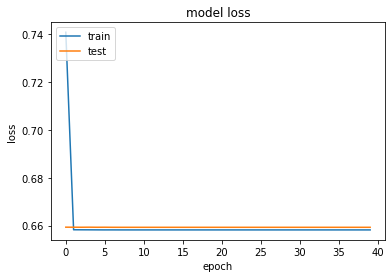

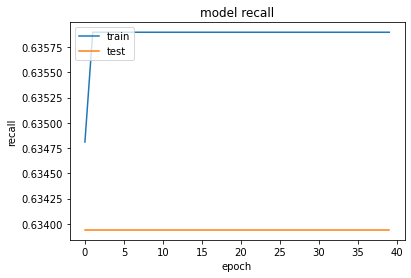

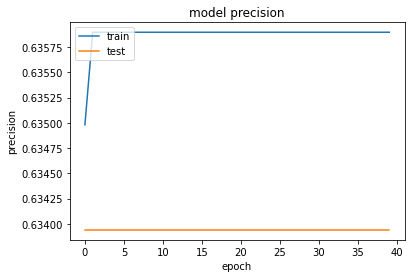

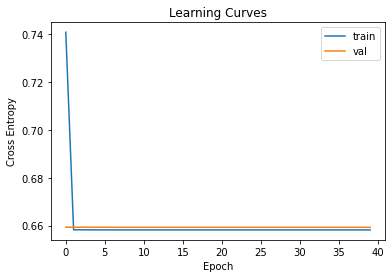

In [11]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)
fig.cross_entropy_graph(model_,dir_name)

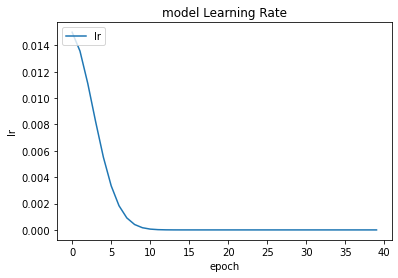

In [12]:
fig.lr_graph(model_,dir_name)